In [7]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

Import dataset using pandas module


In [8]:
df = pd.read_csv("placement-dataset.csv")
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


Exploratory Data Analysis

In [9]:
df.describe()


,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [11]:
df.isnull().sum()
df.columns


Index(['cgpa', 'package'], dtype='object')

In [12]:
x = df[["cgpa"]]
y = df["package"]

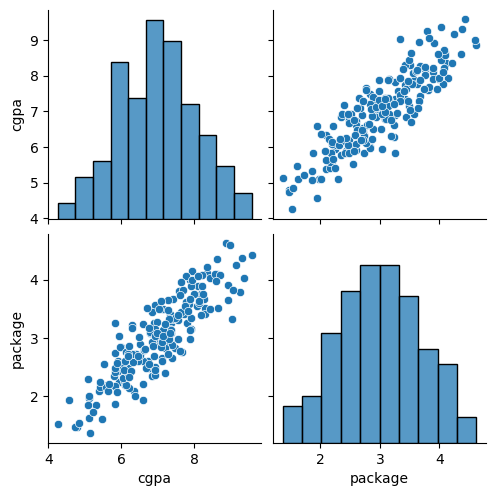

In [13]:
sns.pairplot(df, kind="scatter") # Plot every possible correlation


Train the Model

In [14]:
from sklearn.model_selection import train_test_split # Import the function responsible for splitting the data.
from sklearn.linear_model import LinearRegression # Import the LinearRegression function

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

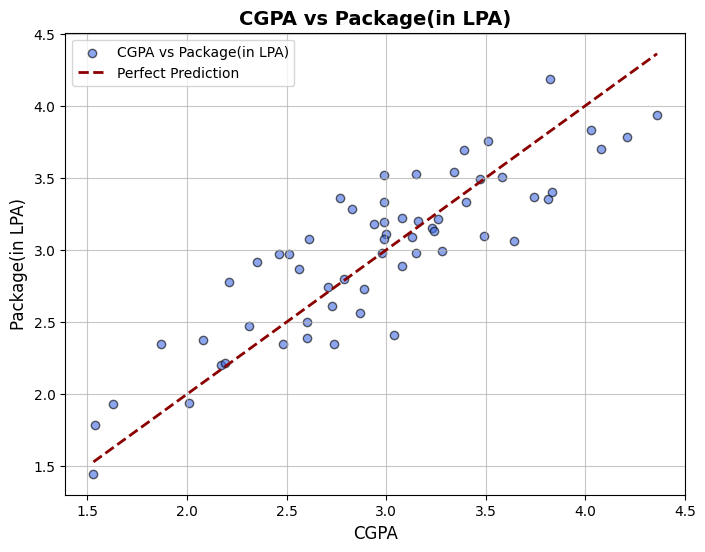

In [15]:
predictions = lm.predict(x_test)
predictions
plt.figure(figsize=(8, 6))

# Scatter plot with a transparent effect
plt.scatter(y_test, predictions, label='CGPA vs Package(in LPA)', color='royalblue', alpha=0.6, edgecolors='black')

# Line representing perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='darkred', linestyle='--', label='Perfect Prediction', linewidth=2)

# Add labels, title, and grid for better readability
plt.xlabel("CGPA", fontsize=12)
plt.ylabel("Package(in LPA)", fontsize=12)
plt.title("CGPA vs Package(in LPA)", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='-', alpha=0.7)

# Show legend with a nicer location
plt.legend(loc='upper left', fontsize=10)

# Display the plot
plt.show()

Model Evaluation


In [16]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mean_absolute_error(y_test, predictions))

In [17]:

print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", mse)
print("Root Mean Squared Error : ", rmse)

Mean Absolute Error :  0.2606898249919377
Mean Squared Error :  0.09995369482155111
Root Mean Squared Error :  0.5105779323393616


In [18]:
import joblib

In [19]:
joblib.dump(lm,"placement-model.pkl")

['placement-model.pkl']